<a href="https://colab.research.google.com/github/robertomoragad/Estadistica/blob/master/Tama%C3%B1o_del_Efecto_y_Potencia_Estad%C3%ADstica_en_la_prueba_de_T_de_Student_para_dos_grupos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Tamaño del Efecto y Potencia Estadística en la prueba de T de Student para dos grupos



In [166]:
#aqui mis coordenadas
name = 'Roberto Andres Moraga Diaz'
role = 'Lean-Agile Coach'
mission = 'Business 4.0'
organization = 'TCS latam'


print(f'Saludos cordiales! \t | {name} \n \n Soy un {role} ayudando a crecer y transformar negocios con {mission} de {organization[0:3:1]}')
print(f'conversemos en lkdn o por el correo {name[0:7:1]}.{name[15:21:1]}@{organization[0:3:1]}.com .')

Saludos cordiales! 	 | Roberto Andres Moraga Diaz 
 
 Soy un Lean-Agile Coach ayudando a crecer y transformar negocios con Business 4.0 de TCS
conversemos en lkdn o por el correo Roberto.Moraga@TCS.com .



### Introducción

En muchas investigaciones (ensayos clínicos, mejora de procesos, marketing, desarrollo de productos, otros) es necesario comparar ciertas características en dos o más grupos de personas o elementos (transacciones, productos, operaciones, etc).  Por ejemplo, si pensamos que un tratamiento nuevo puede tener un porcentaje de mejoría mayor que otro estándar, o cuando nos planteamos si las personas de distintas localidades tienen o no el mismo consumo monetario en  determinados productos o campañas comerciales.

Lo anterior se desarrolla como un trabajo de investigación para comprobar una hipótesis. Tal sería el caso, por ejemplo medir:
*   el efecto de la suplementación de lecitina de soja sobre el perfil lipídico.
*   el efecto de una nuevo modelo de servicio sobre la experiencia del cliente.
*   el efecto de una nueva campaña comercial sobre la tasa de conversión.
*   el efecto de una nueva funcionalidad de producto en la ventas.
*   otras...



Para esto es común diseñar un experimento donde se realice una comparación de 2 grupos para verificar si existen diferencias en la variable objeto de estudio. Estos grupos son:

* A)  Grupo de experimental (al que aplicamos el tratamiento)
* B)  Grupo de control (no reciben ningún tratamiento)

En este caso la Hipótesis nula (H0) planteará que el efecto del tratamiento experimental es similar a cuando no se recibe ningún tratamiento.



```
#nota: En este artículo se analizará únicamente el problema de la comparación de dos grupos independientes con 'test t Student'. 
La comparación de muestras pareadas con 't Student' y la comparación de varios grupos (>= 3) con 'ANOVA' se verá en otro documento.
```






###Reporte en un Trabajo de investigación

Hasta aquí nada nuevo, lo que ocurre es que generalmente cuando se presentan los resultados de una investigación sólo se informa el intervalo de confianza de las diferencias de medias, las respectivas medias y desviaciones estandar de las muestras de los grupos y finalmente si el valor-p (p-value) obtenido en la prueba de hipótesis fue menor al nivel de significancia escogido. 

Muchas asociaciones internacionales* de investigación han recomendado que para presentar un trabajo de investigación completo se cumplan 5 requisitos:

1.  el cálculo de intervalos de confianza 'IC' de la diferencia (límites probables entre los que se encuentra la verdadera diferencia entre dos medias), 
2.  la exposición de los valores de las medias y desviaciones estandar de cada grupo,
3.  la entrega de los valores exactos de probabilidad (p-value), 
4.  informar la potencia estadística de la prueba utilizada, y 
5.  calcular el tamaño del efecto que cuantifica la magnitud de la diferencia entre dos medias.


** American Psychological Association (APA, 1994, 2008, 2011), Journal of Graduate Medical Education*

Las omisiones de los puntos 4 y 5 ponen en duda la credibilidad de los estudios y sus hallazgos, ya que son esenciales para que los lectores comprendan el impacto total de la investigación desarrollada. Se recomienda que la potencia estadística y el tamaño del efecto sean reportadas tanto en las secciones de Resumen como de Resultados de la investigación.



Para comprender como calcular estas medidas se desarrollarán unos ejemplos,  los que serán ejecutados en python para calcular los 5 requisitos anteriormente mencionados.  Es importante mencionar que estos ejemplos serán calculados en principio en modo *Post Hoc análisis*.  Aunque esta técnica ha sido cuestionada ya que no permite diseñar y planear de antemano un estudio, al menos permite comprender adecuadamente los resultados de dichas investigaciones.

En la última sección del documento se presentará como aplicar un análisis *A Priori*, para determinar el tamaño de la muestra cuando se diseña un nuevo estudio sujeto a ciertas exigencias estadísticas.

###¿Qué es el tamaño del efecto?

El tamaño del efecto es el principal hallazgo de un estudio cuantitativo y debe ser informado junto con la significancia estadística 'valor-p', esto debido a que el valor-p puede informar si existe un efecto, pero no revelará el tamaño de dicho efecto (significancia sustantiva).

Una prueba estadística con una muestra suficientemente grande, casi siempre reportará una diferencia estadísticamente significativa (p-value < alpha), sin embargo, las diferencias muy pequeñas, incluso significativas, a menudo carecen de sentido práctico (significancia sustantiva). Por lo tanto, informar sólo el valor-p de la investigación sin el 'tamaño del efecto' resulta incompleto para que la audiencia comprenda adecuadamente los resultados y/o posteriormente se pueda realizar meta-análisis.




```
El referente Geoff Cumming en su libro 'Entendiendo la nueva estadística' indica:

" A veces, un resultado se informa mejor tanto en unidades originales, para facilitar la comprensión 
de los lectores, como en alguna medida estandarizada para facilitar su inclusión en futuros meta-análisis."
```



El tamaño del efecto absoluto es la diferencia (magnitud) entre los resultados promedios en dos grupos de intervención diferentes (por ejemplo: Control y Experimentación). También se pueden utilizar medidas estandarizadas del efecto, que se calculan para transformar el efecto en una escala fácilmente comprensible.  Los tamaños del efecto estandarizados son útiles para comparar cuantitativamente los resultados de diferentes estudios, a esto se le llama meta-análisis.




###¿Cómo calcular el tamaño del efecto?
Para calcular el tamaño del efecto en los siguientes ejemplos aplicaremos la diferencia estandarizada mediante el índice 'd  de Cohen', que fue desarrollado por el Psicólogo y Estadístico Jacob Cohen. Este índice es apropiado para pruebas de 't Student' y representa el grado de separación entre la hipótesis nula y la hipótesis alternativa. 

 El índice 'd de Cohen', que se obtiene de la siguiente forma:  


```
# d Cohen = media (grupo 1) - media (grupo 2) / desviación estándar.
```

La 'd de Cohen' nos informa de cuántas desviaciones estandar de diferencia hay entre los resultados de los dos grupos que se comparan (grupo experimental y grupo de control).  Cohen clasificó los tamaños del efecto como:
*  pequeño    ( d  = 0.2) 
*  mediano    ( d  = 0.5) 
*  grande     ( d  = 0.8)
*  muy grande ( d  ≥ 1.3)

```
Nota:  Adicional a 'd Cohen' existen otras medidas estandarizadas para comparar grupos, como: Odds ratio (OR) y risk ratio (RR).
```

*''El producto principal de una investigación es una o más medidas del tamaño del efecto, no los valores P (p-value) '' - J. Cohen*

<img src='https://drive.google.com/uc?export=view&id=1bU3MxwkrB62RQRj_l4oRLMMKUbPTz4nP' width="300" align="left" style="margin-right: 20px"> 
<br>

<p style="font-size:4pt"> 
Imagen gentileza de: Roberto Moraga</p>

###¿Qué es el poder estadístico o potencia de la prueba?

Es la probabilidad de que una investigación encuentre una diferencia estadísticamente significativa entre los grupos cuando existe una diferencia real. La potencia es 1-β, donde β es la probabilidad de concluir que no existe efecto cuando realmente existe. Este error se llama **Error de tipo II**. 

Al igual que la significación estadística, la potencia estadística depende del tamaño del efecto y del tamaño de la muestra. Si el tamaño del efecto de la intervención es grande, será posible detectar dicho efecto con muestras más pequeñas, mientras que un tamaño de efecto más pequeño requeriría tamaños de muestra más grandes.  Como se mencionó anteriormente las muestra de tamaños enormes pueden detectar diferencias que son bastante pequeñas, pero posiblemente triviales. Para determinar que tan importante es la diferencia encontrada dependerá de criterios de relevancia asociados al campo de la investigación (industrial, clínico, científico, etc ).

**Error de tipo I:**
Es la probabilidad de rechazar la hipótesis nula (H0) cuando es realmente cierta. La probabilidad de cometer un error de tipo I es α, que es el nivel de significancia que estableces para la prueba de hipótesis.


**Tipos de errores**
<img src='https://drive.google.com/uc?export=view&id=1oNsX7umPtZ6yZeGw3XBL_g-TbAPGRIQF' width="900" align="left" style="margin-right: 20px"> 
<br>


<p style="font-size:8pt"> 
Imagen gentileza de: Roberto Moraga</p>

###Prueba t de Student de 2 muestras

Fundamentalmente, cuando se comparan dos grupos de observaciones para probar si las medias poblacionales desconocidas de dos grupos son iguales o no, se utiliza la prueba t de 2 muestras o también conocida como el test 't de Student'. Aquí podemos encontrar dos tipos de diseño del test: 

* **Muestras independientes:** aquel en el que las observaciones se refieren a dos grupos independientes de individuos, o
* **Muestras pareadas:** el caso en el que cada serie de datos se recoge en los mismos individuos(personas/elementos) bajo condiciones diferentes. 

**¿Es lo mismo que una prueba A / B?**  Sí, se utiliza una prueba t de dos muestras para analizar los resultados de las pruebas A / B.


Para el caso de  'muestras independientes' este método paramétrico requiere que las observaciones en cada grupo sean tomadas al azar, provengan de una distribución normal o aproximadamente normal con una variabilidad semejante. Para comprobar normalidad de los datos existen pruebas estadísticas (test Anderson Darling, test de Kolmogorov-Smirnov, test de Shapiro-Wilks) y para comprobar semejanza de varianzas existe el test de fisher (f-test).

Para los ejemplos a presentar se desarrollará el test t de Student asumiendo que ambas condiciones se cumplen.    

**¿Qué pasa si no existe igualdad de varianza?**
Adicionalmente se desarrollará un ejemplo *(ver ejemplo 3)* para abordar formalmente el caso en el que las varianzas no sean similares.




###Pasos para una prueba t de 2 muestras

Los pasos a seguir para realizar un t-test de medias independientes en modo Post Hoc son:

1. Obtener estadísticos de las muestras (n, media, sigma).
2. Determinar el nivel de significancia α.
3. Estimar el intervalo de confianza de la diferencia de medias.
4. Plantear las hipótesis.
5. Calcular el estadístico T crítico a emplear.
6. Determinar el tipo de test, una o dos colas.
7. Calcular el estadístico T de prueba.
8. Calcular el p-value y comparación con el nivel de significancia establecido.
9. Concluir prueba de hipótesis
10. Calcular la potencia de la prueba (1 - β)
11. Calcular el tamaño del efecto.
12. Conclusiones finales



###Ejemplos para 2 grupos con varianzas desconocidas pero iguales

####Ejemplo 1.1

Se desarrolla un estudio para medir la 'Lealtad con la Marca' en dos grupos de personas (clientes) afectadas por corte de suministro en los últimos seis meses. A estas personas se les pedía que evaluaran su percepción de la probabilidad de recomendar la Marca a otras personas (en una escala que va de 0 a 10). 

Grupo Experimental:
Personas que recibieron un nuevo modelo de servicio de atención (n= 160; Media= 6.21 y Sigma= 0.94) 

Grupo Control:
Personas que recibieron el normal servicio de atención (n=190; Media= 5.89; y Sigma= 0.94)

**Planteamiento experimento**
<img src='https://drive.google.com/uc?export=view&id=1TDsxXWJ5OL598VPvfTg3q7wyagvYdIK_' width="900" align="left" style="margin-right: 20px"> 
<br>


<p style="font-size:8pt"> 
Imagen gentileza de: Roberto Moraga</p>



---


*Nota: En este ejemplo lo ideal es que se tenga una medición inicial de los 2 grupos (pre-test) para tener un adecuado grado de certeza de que no exhiben diferencia de medias (p-value > alpha) y además conocer sus varianzas.   Este estudio pre-test puede servir como piloto para cuando se quiera diseñar una investigación y aplicar análisis A Priori.*


Veamos en el siguiente paso a paso el cálculo con python:

In [ ]:
#Primero importamos librerias estadisticas con las que vamos a trabajar, esto de la siguiente forma: 
import numpy as np # importando numpy
from scipy import stats # importando scipy.stats
import matplotlib.pyplot as plt #importando matplotlib

In [ ]:
#Analisis post hoc utilizando t Student, suponiendo igual varianza pero desconocida

## 1) cargar datos muestras: tamaño (n), media (xbarra) y sigma (S)
#muestra 1
n_1 = 160
xbarra_1 = 6.21
S_1 = 0.94

#muestra 2
n_2 = 190
xbarra_2 = 5.89
S_2 = 0.94


## 2) Determinar Nivel de Significancia
alpha = 0.05


**Pasos 1 a 3**


<img src='https://drive.google.com/uc?export=view&id=1-Zqo1PwpY32Yg3pvDat0B0jlc9oB9JTp' width="900" align="left" style="margin-right: 20px"> 
<br>


<p style="font-size:8pt"> 
Imagen gentileza de: Roberto Moraga</p>

In [ ]:
## 3) Estimar el IC de la diferencia de medias
#calcular T critico 2 colas con Scipy
Tcritico = stats.t.ppf(1 - (alpha/2), df=(n_1 + n_2 - 2))
print ('T critico: ',Tcritico)

#Estimar mancomunado de la varianza poblacional
# S**2 = ( S1**2 *(n1 - 1) + S2**2 *(n2 - 1)) / ( n1 + n2 - 2)
var = ( S_1**2 *(n_1 - 1) + S_2**2 *(n_2 - 1)) / (n_1 + n_2 - 2)
S = np.sqrt(var)
print('Varianza mancomunada: ',var)
print('Sigma poblacion :', S)

#calcular Sigma de diferencia de medias
S_dif = np.sqrt( (S**2 / n_1) + (S**2 / n_2) )
print('S diferencia medias: ',S_dif)

#IC diferencia medias al 1-alpha:
LI = (xbarra_1 - xbarra_2) - Tcritico * S_dif
LS = (xbarra_1 - xbarra_2) + Tcritico * S_dif
print('IC diferencia medias al', 1-alpha, 'NC : ', LI, LS)

#otra forma con Scipy
IC = stats.t.interval(1-alpha, loc=xbarra_1 - xbarra_2, scale=S_dif, df=(n_1 + n_2 -2))
print('IC diferencia medias al', 1-alpha, 'NC : ', IC)

T critico:  1.9668042230481182
Varianza mancomunada:  0.8835999999999999
Sigma poblacion : 0.94
S diferencia medias:  0.10086142134527687
IC diferencia medias al 0.95 NC :  0.12162533055547411 0.5183746694445265
IC diferencia medias al 0.95 NC :  (0.12162533055547411, 0.5183746694445265)


In [37]:
## 4) plantear hipotesis
 # H0:  Mu 1 = Mu 2
 # H1:  Mu 1 ≠ Mu 2

#regla decision (2 colas)
 # no rechazar H0 si: -Tcritico <= T <= Tcritico
 # rechazar HO si: T < -Tcritico o T > Tcritico


## 5) Calcular el estadístico T crítico a emplear
Tcritico = Tcritico #fue obtenido en paso anterior


## 6) Determinar el tipo de test, una o dos colas.
#como la hipotesis alternativa es del tipo “diferente de” se trata de un test de dos colas
#Nota: Se recomienda utilizar el contraste bilateral para estos análisis dado que éstos 
#requieren una mayor diferencia para detectar una misma potencia


## 7 ) Calcular el estadístico T de prueba.
T = ( xbarra_1 - xbarra_2 - 0) / S_dif
print('T prueba: ', T)

## 8) Calcular el p-value y comparación con el nivel de significancia establecido.
#calcular p-value
pvalue = 1 - (stats.t.cdf(T, df=(n_1 + n_2 -2))) #T prueba se encuentra en cola derecha
print('p-value (significancia estadística): ', pvalue*2) #2 colas multiplicar por 2

## 9) Concluir prueba de hipotesis:

T prueba:  3.1726699438881667
p-value (significancia estadística):  0.0016449096397932461


9) Concluir resultados de la prueba de hipotesis:

Como T prueba > Tcritico o como p-value menor a alpha, se rechaza H0, las medias son diferentes.



**Pasos 4 a 11**


<img src='https://drive.google.com/uc?export=view&id=11kB-ZuwHs-LoKwQ1EOXeTP7aSek13zfd' width="900" align="left" style="margin-right: 20px"> 
<br>


<p style="font-size:8pt"> 
Imagen gentileza de: Roberto Moraga</p>

In [38]:
## 10) Calcular la potencia de la prueba (1 - beta)

#buscar el valor en puntos correspondiente al T critico
x = 0 + (Tcritico * S_dif)# por la derecha
#print('X promedio para T=',Tcritico,': ',x)

#otra forma mas simple con Scipy usando ppf
x_b = stats.t.ppf((1-alpha/2), df=n_1 + n_2 - 2 , loc=0, scale=S_dif)
#print('X promedio para T=',Tcritico,': ',x_b)


#Calcular Beta (error tipo II)
#forma simple con Scipy
beta = stats.t.cdf(x, df=n_1 + n_2 -2, loc=xbarra_1-xbarra_2, scale=S_dif)
print('Beta: ',beta)

#otra forma simple con Scipy
beta1 = stats.t.cdf(Tcritico-T, df= n_1 + n_2 - 2)
print('otra forma beta: ', beta1)

#Calcular Potencia estadística (1- beta)
print('Potencia de la prueba: ', 1-beta)


## 11) Calcular el tamaño del efecto
#d de Cohen para T-TEST INDEPENDIENTES: (diferencia medias grupos / S mancomunada)
dif_bruta = (xbarra_1 - xbarra_2)
dCohen = (xbarra_1 - xbarra_2) / S
print('d Cohen: ', dCohen)
print('diferencia bruta: ', dif_bruta)

Beta:  0.11434424603074098
otra forma beta:  0.11434424603074096
Potencia de la prueba:  0.885655753969259
d Cohen:  0.34042553191489394
diferencia bruta:  0.3200000000000003


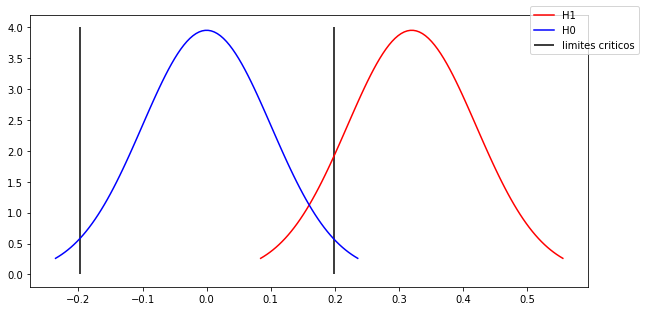

In [39]:
#graficar
#Graficando la distribucion de las diferencias de medias
n= n_1 + n_2
xbar = xbarra_1 - xbarra_2
S_dif = S_dif

#proyectar distribucion diferencias medias (H1)
dif_medias_H1 = stats.t(loc=xbar, scale=S_dif, df=(n-1))
x = np.linspace(dif_medias_H1.ppf(0.01), dif_medias_H1.ppf(0.99), 100)
pdf = dif_medias_H1.pdf(x) #funcion densidad probabilidad

#proyectar distribucion H0
dif_medias_H0 = stats.t(loc=0, scale=S_dif, df=(n-1))
x_m = np.linspace(dif_medias_H0.ppf(0.01), dif_medias_H0.ppf(0.99), 100)
pdf_m = dif_medias_H0.pdf(x_m) #funcion densidad probabilidad

plt.figure(figsize=(10, 5)) #tamaño grafico
plt.plot(x, pdf,"r") #dif medias H1 fit
plt.plot(x_m, pdf_m,"b", ) #dif medias H0 fit
plt.vlines(ymin=0, ymax=4, x=0 - Tcritico*S_dif)#LI IC
plt.vlines(ymin=0, ymax=4, x= 0 + Tcritico*S_dif)#LS IC
plt.legend(['H1','H0', 'limites criticos'],bbox_to_anchor=(1.1,1.05))
plt.show()



**Conclusiones finales**


Al realizar las pruebas de diferencia de medias, el análisis arrojó que las diferencias fueron estadísticamente significativas (t(348)=3.17; p-value= 0.002; IC diferencias al 95% [0.122 , 0.518]), es decir, las personas que recibieron un nuevo protocolo de atención puntuaron significativamente más alto que las personas con el modelo tradicional de atención.

Además se aprecia que el tamaño del efecto (d Cohen=0.34) arrojado es mediano-bajo de acuerdo  a los valores definidos convencionalmente en tabla Cohen. En términos prácticos (según criterio experto en servicio al cliente) la diferencia no es relevante, ya que la diferencia bruta es pequeña (0.32).
 La potencia estadística (1-β=0.89) supera los niveles mínimos exigidos (80%), constatándose en el análisis anterior (beta) que la probabilidad de cometer un error de tipo II es del 11%. El error tipo I (alpha) es 5%.

 Con base en lo anterior se puede conluir que el tratamiento funciona pero su efecto es bajo.



---



####Ejemplo 2.1

Se quiere estudiar el efecto de un fármaco sobre el apetito, para ello se mide la ingesta de comida (gramos) de dos grupos de personas seleccionadas al azar. En vista de los resultados ¿Se puede considerar que el fármaco funciona para un nivel de significancia del 5%?

Grupo Experimental:
Personas que recibieron el fármaco (n= 22; Media= 27.1 y Sigma= 26.4) 

Grupo Control:
Personas que recibieron un placebo (n= 22; Media= 52.1; y Sigma= 45.1)


Veamos en el siguiente paso a paso el cálculo con python:

In [41]:
#Analisis post hoc utilizando t Student, suponiendo igual varianza pero desconocida

## 1) cargar datos muestras: tamaño (n), media (xbarra) y sigma (S)
#muestra 1
n_1 = 22
xbarra_1 = 52.1 
S_1 = 45.1

#muestra 2
n_2 = 22
xbarra_2 = 27.1
S_2 = 26.4


## 2) Determinar Nivel de Significancia
alpha = 0.05


## 3) Estimar el IC de la diferencia de medias
#calcular T critico 2 colas con Scipy
Tcritico = stats.t.ppf(1 - (alpha/2), df=(n_1 + n_2 - 2))
print ('T critico: ',Tcritico)

#Estimar mancomunado de la varianza poblacional
# S**2 = ( S1**2 *(n1 - 1) + S2**2 *(n2 - 1)) / ( n1 + n2 - 2)
var = ( S_1**2 *(n_1 - 1) + S_2**2 *(n_2 - 1)) / (n_1 + n_2 - 2)
S = np.sqrt(var)
print('Varianza mancomunada: ',var)
print('Sigma poblacion :', S)

#calcular Sigma de diferencia de medias
S_dif = np.sqrt( (S**2 / n_1) + (S**2 / n_2) )
print('S diferencia medias: ',S_dif)

#IC diferencia medias al 1-alpha:
LI = (xbarra_1 - xbarra_2) - Tcritico * S_dif
LS = (xbarra_1 - xbarra_2) + Tcritico * S_dif
print('IC diferencia medias al', 1-alpha, 'NC : ', LI, LS)

#otra forma con Scipy
IC = stats.t.interval(1-alpha, loc=xbarra_1 - xbarra_2, scale=S_dif, df=(n_1 + n_2 -2))
print('IC diferencia medias al', 1-alpha, 'NC : ', IC)

T critico:  2.018081697095881
Varianza mancomunada:  1365.4850000000001
Sigma poblacion : 36.95246947092981
S diferencia medias:  11.14158875564881
IC diferencia medias al 0.95 NC :  2.5153636556558645 47.48463634434414
IC diferencia medias al 0.95 NC :  (2.5153636556558645, 47.48463634434414)


In [44]:
## 4) plantear hipotesis
 # H0:  Mu 1 = Mu 2
 # H1:  Mu 1 ≠ Mu 2

#regla decision (2 colas)
 # no rechazar H0 si: -Tcritico <= T <= Tcritico
 # rechazar HO si: T < -Tcritico o T > Tcritico


## 5) Calcular el estadístico T crítico a emplear
Tcritico = Tcritico #fue obtenido en paso anterior


## 6) Determinar el tipo de test, una o dos colas.
#como la hipotesis alternativa es del tipo “diferente de” se trata de un test de dos colas
#Nota: Se recomienda utilizar el contraste bilateral para estos análisis dado que éstos 
#requieren una mayor diferencia para detectar una misma potencia


## 7 ) Calcular el estadístico T de prueba.
T = ( xbarra_1 - xbarra_2 - 0) / S_dif
print('T prueba: ', T)


## 8) Calcular el p-value y comparación con el nivel de significancia establecido.
#calcular p-value
pvalue = 1 - (stats.t.cdf(T, df=(n_1 + n_2 -2))) #T prueba se encuentra en cola derecha
print('p-value (significancia estadística): ', pvalue*2) #2 colas multiplicar por 2

## 9) Concluir prueba de hipotesis:
#como T prueba > Tcritico o como p-value menor a alpha, se rechaza H0, las medias son diferentes.

T prueba:  2.243845159634432
p-value (significancia estadística):  0.03017203250342604


In [45]:
## 10) Calcular la potencia de la prueba (1 - beta)

#buscar el valor en gramos correspondiente al T critico
x = 0 + (Tcritico * S_dif)# por la derecha
#print('X promedio para T=',Tcritico,': ',x)

#otra forma mas simple con Scipy usando ppf
x_b = stats.t.ppf((1-alpha/2), df=n_1 + n_2 - 2 , loc=0, scale=S_dif)
#print('X promedio para T=',Tcritico,': ',x_b)


#Calcular Beta (error tipo II)
#forma simple con Scipy
beta = stats.t.cdf(x, df=n_1 + n_2 -2, loc=xbarra_1-xbarra_2, scale=S_dif)
print('Beta: ',beta)

#Calcular Potencia estadística (1- beta)
print('Potencia de la prueba: ', 1-beta)


## 11) Calcular el tamaño del efecto
#d de Cohen para T-TEST INDEPENDIENTES: (diferencia medias grupos / S mancomunada)
dif_bruta = (xbarra_1 - xbarra_2)
dCohen = (xbarra_1 - xbarra_2) / S
print('d Cohen: ', dCohen)
print('diferencia bruta: ', dif_bruta)

Beta:  0.41124021315410253
Potencia de la prueba:  0.5887597868458975
d Cohen:  0.6765447711056843
diferencia bruta:  25.0


**Conclusión:**

p-value < α, hay evidencias significativas para rechazar H0 en favor de H1, siendo el tamaño del efecto (d-Cohen) medio, sin embargo la Potencia estadística no supera el umbral del 0.80, es decir, no tiene un poder aceptable para respaldar la H0.  
No se puede afirmar que el tratamiento funciona.



---



####Ejemplo 2.2

Se quiere estudiar el efecto de la lecitina de soja sobre el perfil lipídco, para ello se mide el perfil lídpido de dos grupos de personas seleccionadas al azar. En vista de los resultados ¿Se puede considerar que el fármaco funciona para un nivel de significancia del 5?

Grupo Experimental:
Personas que recibieron licitina (n= 25; Media= 251.08; y Sigma= 55.928) 

Grupo Control:
Personas que recibieron un placebo (n= 25; Media= 216.20; y Sigma= 41.481)


Veamos en el siguiente paso a paso el cálculo con python:

In [46]:
#Analisis post hoc utilizando t Student, suponiendo igual varianza pero desconocida

## 1) cargar datos muestras: tamaño (n), media (xbarra) y sigma (S)
#muestra 1 (control)
n_1 = 25
xbarra_1 = 251.08
S_1 = 55.928

#muestra 2 (experimental)
n_2 = 25
xbarra_2 = 216.20
S_2 = 41.481


## 2) Determinar Nivel de Significancia
alpha = 0.05


## 3) Estimar el IC de la diferencia de medias
#calcular T critico 2 colas con Scipy
Tcritico = stats.t.ppf(1 - (alpha/2), df=(n_1 + n_2 - 2))
print ('T critico: ',Tcritico)

#Estimar mancomunado de la varianza poblacional
# S**2 = ( S1**2 *(n1 - 1) + S2**2 *(n2 - 1)) / ( n1 + n2 - 2)
var = ( S_1**2 *(n_1 - 1) + S_2**2 *(n_2 - 1)) / (n_1 + n_2 - 2)
S = np.sqrt(var)
print('Varianza mancomunada: ',var)
print('Sigma poblacion :', S)

#calcular Sigma de diferencia de medias
S_dif = np.sqrt( (S**2 / n_1) + (S**2 / n_2) )
print('S diferencia medias: ',S_dif)

#IC diferencia medias al 1-alpha:
LI = (xbarra_1 - xbarra_2) - Tcritico * S_dif
LS = (xbarra_1 - xbarra_2) + Tcritico * S_dif
print('IC diferencia medias al', 1-alpha, 'NC : ', LI, LS)

#otra forma con Scipy
IC = stats.t.interval(1-alpha, loc=xbarra_1 - xbarra_2, scale=S_dif, df=(n_1 + n_2 -2))
print('IC diferencia medias al', 1-alpha, 'NC : ', IC)

T critico:  2.0106347546964454
Varianza mancomunada:  2424.3072725
Sigma poblacion : 49.237254924497975
S diferencia medias:  13.9263987376493
IC diferencia medias al 0.95 NC :  6.879098690321637 62.88090130967841
IC diferencia medias al 0.95 NC :  (6.879098690321637, 62.88090130967841)


In [49]:
## 4) plantear hipotesis
 # H0:  Mu 1 = Mu 2
 # H1:  Mu 1 ≠ Mu 2

#regla decision (2 colas)
 # no rechazar H0 si: -Tcritico <= T <= Tcritico
 # rechazar HO si: T < -Tcritico o T > Tcritico


## 5) Calcular el estadístico T crítico a emplear
Tcritico = Tcritico #fue obtenido en paso anterior


## 6) Determinar el tipo de test, una o dos colas.
#como la hipotesis alternativa es del tipo “diferente de” se trata de un test de dos colas
#Nota: Se recomienda utilizar el contraste bilateral para estos análisis dado que éstos 
#requieren una mayor diferencia para detectar una misma potencia


## 7 ) Calcular el estadístico T de prueba.
T = ( xbarra_1 - xbarra_2 - 0) / S_dif
print('T prueba: ', T)



## 8) Calcular el p-value y comparación con el nivel de significancia establecido.
#calcular p-value
pvalue = 1 - (stats.t.cdf(T, df=(n_1 + n_2 -2))) #T prueba se encuentra en cola derecha
print('p-value (significancia estadística): ', pvalue*2) #2 colas multiplicar por 2

## 9) Concluir prueba de hipotesis:
#como T prueba > Tcritico o como p-value menor a alpha, se rechaza H0, las medias son diferentes.

T prueba:  2.5045958152629755
p-value (significancia estadística):  0.015708804968280976


In [51]:
## 10) Calcular la potencia de la prueba (1 - beta)

#buscar el valor en puntos correspondiente al T critico
x = 0 + (Tcritico * S_dif)# por la derecha
#print('X promedio para T=',Tcritico,': ',x)

#otra forma mas simple con Scipy usando ppf
x_b = stats.t.ppf((1-alpha/2), df=n_1 + n_2 - 2 , loc=0, scale=S_dif)
#print('X promedio para T=',Tcritico,': ',x_b)


#Calcular Beta (error tipo II)
#forma simple con Scipy
beta = stats.t.cdf(x, df=n_1 + n_2 -2, loc=xbarra_1-xbarra_2, scale=S_dif)
print('Beta: ',beta)

#otra forma simple para calcular Beta con Scipy
beta1 = stats.t.cdf(Tcritico-T, df= n_1 + n_2 - 2)
print('otra forma beta: ', beta1)

#Calcular Potencia estadística (1- beta)
print('Potencia de la prueba: ', 1-beta)


## 11) Calcular el tamaño del efecto
#d de Cohen para T-TEST INDEPENDIENTES: (diferencia medias grupos / S mancomunada)
dif_bruta = (xbarra_1 - xbarra_2)
dCohen = (xbarra_1 - xbarra_2) / S
print('d Cohen: ', dCohen)
print('diferencia bruta: ', dif_bruta)

Beta:  0.3117933099132414
otra forma beta:  0.3117933099132414
Potencia de la prueba:  0.6882066900867586
d Cohen:  0.7084066740415599
diferencia bruta:  34.880000000000024


EL grupo de  personas que recibieron la complementación con licitina de soja exhiben un nivel de colesterol total significativamente más bajo que el grupo de personas que no lo recibió. Estas diferencias fueron estadísticamente significativa (p-value=0.016).

Se aprecia que el tamaño del efecto estadarizado es (d Cohen = 0.708) es mediano, sin embargo la Potencia estadística no supera los niveles mínimos exigidos (0.80), es decir, existe una alta probabilidad de cometer Error Tipo II (beta = 0.31) si se rechaza la Hipotesis nula (H0).



---



###Ejemplos para 2 grupos con varianzas no iguales

####Ejemplo 3.1 (varianzas desiguales)

Se quiere estudiar el efecto de aplicar un nuevo método de trabajo (kanban) en los tiempos de entrega de los requerimientos de negocio, para ello se mide el tiempo transcurrido desde que se reciben los requerimientos hasta que estos han sido completados (en días), esto en dos grupos de trabajos seleccionados al azar. 

En vista de los resultados ¿Se puede considerar que el nuevo método reduce los tiempos de desarrolo y entrega, para un nivel de significancia del 5%?

* Grupo Experimental:
 Grupo de requerimientos trabajados con nuevo método (n= 41; Media= 9.04; y Sigma= 5.9) 

* Grupo Control:
Grupo de requerimientos trabajados en modo tradicional (n= 29; Media= 24.41; y Sigma= 19.1)



```
# Nota 1: En este ejemplo aplicaremos la prueba t Student de muestras independientes 
con varianza distintas, aquí estimaremos los grados de libertad con una fórmula en el paso 3.
```

```
# Nota 2: Este ejemplo corresponde a un caso real desarrollado en la organización de 
Data Management & Analytics de una compañía de Telecomunicaciones - año 2018.
```





**Pasos 1 a 11 cuando varianzas no son iguales**


<img src='https://drive.google.com/uc?export=view&id=13J1Y7UNNeY7Qs36Hqzds1v6uq2PxSAn5' width="1000" align="left" style="margin-right: 20px"> 
<br>



<p style="font-size:8pt"> 
Imagen gentileza de: Roberto Moraga</p>



Veamos en el siguiente paso a paso el cálculo con python:

In [53]:
#Analisis post hoc utilizando t Student, con desigual varianza***

## 1) cargar datos muestras: tamaño (n), media (xbarra) y sigma (S)
#muestra 1 (control)
n_1 = 29
xbarra_1 = 24.41
S_1 = 19.1

#muestra 2 (experimental)
n_2 = 41
xbarra_2 = 9.04
S_2 = 5.9


## 2) Determinar Nivel de Significancia
alpha = 0.05


## 3) Estimar el IC de la diferencia de medias


#Estimar grados de libertad cuando varianzas poblacionales no son iguales
# gl = (S1**2 /n1 + S2**2 /n2)**2 / ( ( (S1**2/n1)**2 / (n1-1) ) + ( (S2**2/n2)**2 / (n2-1) ) )
gl = (S_1**2 /n_1 + S_2**2 /n_2)**2  /  ( ( (S_1**2/n_1)**2 / (n_1-1) ) + ( (S_2**2/n_2)**2 / (n_2-1) ) )
print('estimacion gl: ', gl)

#calcular T critico 2 colas con Scipy
Tcritico = stats.t.ppf(1 - (alpha/2), df=gl)
print ('T critico: ',Tcritico)


#Estimar mancomunado de la varianza poblacional (S pooled) =>  #NO APLICA para calcular IC ya que Varianzas son diferentes
#Se aplica la varianza mancomunada para calcular 'd Cohen' en el ultimo paso, por esta razon se calcula aqui:
var = ( S_1**2 *(n_1 - 1) + S_2**2 *(n_2 - 1)) / (n_1 + n_2 - 2)
S = np.sqrt(var)
print('Varianza mancomunada: ',var)
print('Sigma poblacion :', S)


#como las varianzas son diferentes, el calculo del 'Sigma diferencias  medias' es de la siguiente forma:
S_dif = np.sqrt( (S_1**2 / n_1) + (S_2**2 / n_2) )
print('S diferencia medias: ',S_dif)

#IC diferencia medias al 1-alpha:
LI = (xbarra_1 - xbarra_2) - Tcritico * S_dif
LS = (xbarra_1 - xbarra_2) + Tcritico * S_dif
print('IC diferencia medias al', 1-alpha, 'NC : ', LI, LS)

#otra forma con Scipy
IC = stats.t.interval(1-alpha, loc=xbarra_1 - xbarra_2, scale=S_dif, df=gl)
print('IC diferencia medias al', 1-alpha, 'NC : ', IC)

estimacion gl:  31.805672930052623
T critico:  2.0374215469488908
Varianza mancomunada:  170.6923529411765
Sigma poblacion : 13.064928355761332
S diferencia medias:  3.664516279491428
IC diferencia medias al 0.95 NC :  7.903835573019181 22.836164426980822
IC diferencia medias al 0.95 NC :  (7.903835573019181, 22.836164426980822)


In [54]:
#otra forma de estimar grados de libertad con varianzas desiguales es con la la ecuación Welch–Satterthwaite. 
#Nótese que la verdadera distribución de este estadístico de hecho depende (ligeramente) de dos varianzas desconocidas.
 #gl = (S1**2 /n1 + S2**2 /n2)**2 / ( ( (S1**2/n1)**2 / (n1-1) ) + ( (S2**2/n2)**2 / (n2-1) ) ) - 2
gll = (S_1**2 /n_1 + S_2**2 /n_2)**2  /  ( ( (S_1**2/n_1)**2 / (n_1-1) ) + ( (S_2**2/n_2)**2 / (n_2-1) ) ) -2
print(gll)

29.805672930052623


In [56]:
## 4) plantear hipotesis
 # H0:  Mu 1 = Mu 2
 # H1:  Mu 1 ≠ Mu 2

#regla decision (2 colas)
 # no rechazar H0 si: -Tcritico <= T <= Tcritico
 # rechazar HO si: T < -Tcritico o T > Tcritico


## 5) Calcular el estadístico T crítico a emplear
Tcritico = Tcritico #fue obtenido en paso anterior


## 6) Determinar el tipo de test, una o dos colas.
#como la hipotesis alternativa es del tipo “diferente de” se trata de un test de dos colas
#Nota: Se recomienda utilizar el contraste bilateral para estos análisis dado que éstos 
#requieren una mayor diferencia para detectar una misma potencia


## 7 ) Calcular el estadístico T de prueba
#como varianzas no son iguales, aqui el denominador es el sigma de diferencias calculado en paso #3
T = ( xbarra_1 - xbarra_2 - 0) / S_dif
print('T prueba: ', T)

## 8) Calcular el p-value y comparación con el nivel de significancia establecido.
#calcular p-value
pvalue = 1 - (stats.t.cdf(T, df=(n_1 + n_2 -2))) #T prueba se encuentra en cola derecha
print('p-value (significancia estadística): ', pvalue*2) #2 colas multiplicar por 2

## 9) Concluir prueba de hipotesis:
#como T prueba > Tcritico o como p-value menor a alpha, se rechaza H0, las medias son diferentes.

T prueba:  4.19427799680374
p-value (significancia estadística):  8.106533047613773e-05


In [58]:
## 10) Calcular la potencia de la prueba (1 - beta)

#buscar el valor en días correspondiente al T critico
x = 0 + (Tcritico * S_dif)# por la derecha
#print('X promedio para T=',Tcritico,': ',x)

#otra forma mas simple con Scipy usando ppf
x_b = stats.t.ppf((1-alpha/2), df=n_1 + n_2 - 2 , loc=0, scale=S_dif)
#print('X promedio para T=',Tcritico,': ',x_b)


#Calcular Beta (error tipo II)
#forma simple con Scipy
beta = stats.t.cdf(x, df=n_1 + n_2 -2, loc=xbarra_1-xbarra_2, scale=S_dif)
print('Beta: ',beta)

#otra forma simple para calcular Beta con Scipy
beta1 = stats.t.cdf(Tcritico-T, df= n_1 + n_2 - 2)
print('otra forma beta: ', beta1)

#Calcular Potencia estadística (1- beta)
print('Potencia de la prueba: ', 1-beta)


## 11) Calcular el tamaño del efecto
#aqui utilizaremos la desv. mancomunada (S pooled)
#d de Cohen para T-TEST INDEPENDIENTES: (diferencia medias grupos / S medias 2 sigmas)

dif_bruta = (xbarra_1 - xbarra_2)
dCohen = (xbarra_1 - xbarra_2) / S
print('d Cohen: ', dCohen)
print('diferencia bruta: ', dif_bruta)

Beta:  0.01727755878826268
otra forma beta:  0.017277558788262707
Potencia de la prueba:  0.9827224412117374
d Cohen:  1.176432015658332
diferencia bruta:  15.370000000000001


**Conclusión:**

Las diferencias son estadísticamente significativas (p-value: 0.00), el uso del método kanban en el desarrollo de requerimientos tiene un efecto relevante (d Cohen grande) en los tiempos de procesamiento y la potencia estadística es alta (0.98). 

Por tanto se puede afirmar que el tratamiento reduce de forma sustantiva los tiempos de desarrollo.




---



####Ejemplo 3.2 (varianzas desiguales)
Se quiere estudiar el efecto de aplicar un nuevo método de trabajo (kanban) en los tiempos de entrega de los requerimientos de negocio, para ello se mide el tiempo transcurrido desde que se reciben los requerimientos hasta que estos han sido completados (en días), esto en dos grupos de trabajos seleccionados al azar.

En vista de los resultados ¿Se puede considerar que el nuevo método reduce los tiempos de desarrolo y entrega, para un nivel de significancia del 5%?

Grupo Experimental: Grupo de requerimientos trabajados con nuevo método (n= 76; Media= 5.802; y Sigma= 7.674)

Grupo Control: Grupo de requerimientos trabajados en modo tradicional (n= 70; Media= 9.271; y Sigma= 13.424)



```
Nota 1: En este ejemplo aplicaremos la prueba t Student de muestras independientes 
con varianza distintas, aquí estimaremos los grados de libertad con una fórmula en el paso 3.
```
```
Nota 2: Este ejemplo corresponde a un caso real desarrollado en la organización de 
Gestión de Ambientes (infraestructura TI) de una compañía Financiera - año 2020.
```

In [101]:
#Analisis post hoc utilizando t Student, con desigual varianza***

## 1) cargar datos muestras: tamaño (n), media (xbarra) y sigma (S)
#muestra 1 (control)
n_1 = 70
xbarra_1 = 9.271
S_1 = 11.424

#muestra 2 (experimental)
n_2 = 76
xbarra_2 = 5.802
S_2 = 7.674


## 2) Determinar Nivel de Significancia
alpha = 0.05


## 3) Estimar el IC de la diferencia de medias


#Estimar grados de libertad cuando varianzas poblacionales no son iguales
# gl = (S1**2 /n1 + S2**2 /n2)**2 / ( ( (S1**2/n1)**2 / (n1-1) ) + ( (S2**2/n2)**2 / (n2-1) ) )
gl = (S_1**2 /n_1 + S_2**2 /n_2)**2  /  ( ( (S_1**2/n_1)**2 / (n_1-1) ) + ( (S_2**2/n_2)**2 / (n_2-1) ) )
print('estimacion gl: ', gl)

#calcular T critico 2 colas con Scipy
Tcritico = stats.t.ppf(1 - (alpha/2), df=gl)
print ('T critico: ',Tcritico)


#Estimar mancomunado de la varianza poblacional (S pooled) =>  #NO APLICA para calcular IC ya que Varianzas son diferentes
#Se aplica la varianza mancomunada para calcular 'd Cohen' en el ultimo paso, por esta razon se calcula aqui:
var = ( S_1**2 *(n_1 - 1) + S_2**2 *(n_2 - 1)) / (n_1 + n_2 - 2)
S = np.sqrt(var)
print('Varianza mancomunada: ',var)
print('Sigma poblacion :', S)


#como las varianzas son diferentes, el calculo del 'Sigma diferencias  medias' es de la siguiente forma:
S_dif = np.sqrt( (S_1**2 / n_1) + (S_2**2 / n_2) )
print('S diferencia medias: ',S_dif)

#IC diferencia medias al 1-alpha:
LI = (xbarra_1 - xbarra_2) - Tcritico * S_dif
LS = (xbarra_1 - xbarra_2) + Tcritico * S_dif
print('IC diferencia medias al', 1-alpha, 'NC : ', LI, LS)

#otra forma con Scipy
IC = stats.t.interval(1-alpha, loc=xbarra_1 - xbarra_2, scale=S_dif, df=gl)
print('IC diferencia medias al', 1-alpha, 'NC : ', IC)

estimacion gl:  119.31284988709228
T critico:  1.9800465489234276
Varianza mancomunada:  93.20699474999999
Sigma poblacion : 9.654376973684009
S diferencia medias:  1.6245826702976918
IC diferencia medias al 0.95 NC :  0.25225069023625 6.685749309763752
IC diferencia medias al 0.95 NC :  (0.25225069023625, 6.685749309763752)


In [84]:
#otra forma de estimar grados de libertad con varianzas desiguales es con la la ecuación Welch–Satterthwaite. 
#Nótese que la verdadera distribución de este estadístico de hecho depende (ligeramente) de dos varianzas desconocidas.
 #gl = (S1**2 /n1 + S2**2 /n2)**2 / ( ( (S1**2/n1)**2 / (n1-1) ) + ( (S2**2/n2)**2 / (n2-1) ) ) - 2
gll = (S_1**2 /n_1 + S_2**2 /n_2)**2  /  ( ( (S_1**2/n_1)**2 / (n_1-1) ) + ( (S_2**2/n_2)**2 / (n_2-1) ) ) -2
print(gll)

105.80353481895833


In [102]:
## 4) plantear hipotesis
 # H0:  Mu 1 = Mu 2
 # H1:  Mu 1 ≠ Mu 2

#regla decision (2 colas)
 # no rechazar H0 si: -Tcritico <= T <= Tcritico
 # rechazar HO si: T < -Tcritico o T > Tcritico


## 5) Calcular el estadístico T crítico a emplear
Tcritico = Tcritico #fue obtenido en paso anterior


## 6) Determinar el tipo de test, una o dos colas.
#como la hipotesis alternativa es del tipo “diferente de” se trata de un test de dos colas
#Nota: Se recomienda utilizar el contraste bilateral para estos análisis dado que éstos 
#requieren una mayor diferencia para detectar una misma potencia


## 7 ) Calcular el estadístico T de prueba
#como varianzas no son iguales, aqui el denominador es el sigma de diferencias calculado en paso #3
T = ( xbarra_1 - xbarra_2 - 0) / S_dif
print('T prueba: ', T)

## 8) Calcular el p-value y comparación con el nivel de significancia establecido.
#calcular p-value
pvalue = 1 - (stats.t.cdf(T, df=(n_1 + n_2 -2))) #T prueba se encuentra en cola derecha
print('p-value (significancia estadística): ', pvalue*2) #2 colas multiplicar por 2

## 9) Concluir prueba de hipotesis:
#como T prueba > Tcritico o como p-value menor a alpha, se rechaza H0, las medias son diferentes.

T prueba:  2.135317619363953
p-value (significancia estadística):  0.03442713983854184


In [103]:
## 10) Calcular la potencia de la prueba (1 - beta)

#buscar el valor en días correspondiente al T critico
x = 0 + (Tcritico * S_dif)# por la derecha
#print('X promedio para T=',Tcritico,': ',x)

#otra forma mas simple con Scipy usando ppf
x_b = stats.t.ppf((1-alpha/2), df=n_1 + n_2 - 2 , loc=0, scale=S_dif)
#print('X promedio para T=',Tcritico,': ',x_b)


#Calcular Beta (error tipo II)
#forma simple con Scipy
beta = stats.t.cdf(x, df=n_1 + n_2 -2, loc=xbarra_1-xbarra_2, scale=S_dif)
print('Beta: ',beta)

#otra forma simple para calcular Beta con Scipy
beta1 = stats.t.cdf(Tcritico-T, df= n_1 + n_2 - 2)
print('otra forma beta: ', beta1)

#Calcular Potencia estadística (1- beta)
print('Potencia de la prueba: ', 1-beta)


## 11) Calcular el tamaño del efecto
#aqui utilizaremos la desv. mancomunada (S pooled)
#d de Cohen para T-TEST INDEPENDIENTES: (diferencia medias grupos / S medias 2 sigmas)

dif_bruta = (xbarra_1 - xbarra_2)
dCohen = (xbarra_1 - xbarra_2) / S
print('d Cohen: ', dCohen)
print('diferencia bruta: ', dif_bruta)

Beta:  0.438412528941905
otra forma beta:  0.438412528941905
Potencia de la prueba:  0.561587471058095
d Cohen:  0.35931888815361507
diferencia bruta:  3.469000000000001


Conclusión:

Las diferencias son estadísticamente significativas (p-value: 0.03), el uso del método kanban en el desarrollo de requerimientos tiene un efecto bajo (d Cohen pequeño-mediano) en los tiempos de procesamiento y la potencia estadística baja (0.56).

Por tanto no se puede afirmar que el tratamiento reduce de forma sustantiva los tiempos de desarrollo.



---



---



###Aplicando Análisis a priori

Generalmente se necesita una estimación del tamaño del efecto antes de comenzar una investigación, con el fin de calcular el número de personas o elementos necesarios para evitar un error de tipo II o β. Por tanto antes de iniciar una investigación se debe determinar la cantidad de personas que será suficiente para garantizar (con un grado particular de certeza) que el estudio tiene un poder aceptable para respaldar la hipótesis nula.




**¿Cómo calcular el tamaño de la muestra antes de un estudio?**

Lo primero es calcular la 'potencia del estudio' con un tamaño de efecto estimado. Cohen eligió un error β de 0.2 (él postuló que un error α era más grave que un error β, por esta razón estimó el error β en 4 veces el α, obteniendo β = 0.20), por tanto una potencia estadística (1-β) >= 0.80 es una buena medida.

Luego se debe estimar el 'tamaño del efecto' esto con el objeto de calcular un tamaño de muestra razonable. El tamaño del efecto se puede estimar según la diferencia mínima que los expertos considerarían importante, o mediante los resultados de un trabajo similar publicado o utilizando la tabla de referencia de 'd de Cohen' en la eventualidad de que no se esté familiarizado con la variable de estudio. 

Existen varios sitios donde calcular en línea esto, acá pueden ver una para estimar tamaño muestras para una prueba de diferencia de proporciones:
https://www.evanmiller.org/ab-testing/sample-size.html#!40;80;5;5;0   (en la sección bonus será propuesta una forma de abordarlo).

####Ejemplo 4
Adaptado del libro «R in Action» de Robert Kabacoff (2011).

Un organización mide el tiempo de reacción de las personas ante unos cambios que se producen en un simulador de manejo de automovil. Se cuenta con dos grupos de personas, uno en los cuales los sujetos están hablando por teléfono y otros que no.

**A priori.** Se quiere comparar el tiempo medio de reacción de los participantes en ambos grupos. Se conoce por bibliografía que el tiempo de reacción tiene una desviación estándar (Sigma) de 1.25 segundos y que una diferencia en 1 segundo en el tiempo de reacción se considera una diferencia importante (según criterio de relevancia experto). Para una potencia del 90% y un nivel de confianza del 95%, ¿cuántos participantes necesitamos en nuestro estudio?

Para resolver utilizaremos la libreria STATSMODELS y luego aplicaremos un análisis Post Hoc con los pasos vistos anteriormente.

In [60]:
#estimar tamaño de muestra con analisis de Potencia
from statsmodels.stats.power import TTestIndPower


#definir parametros para el analisis
sigma = 1.25
efecto_bruto = 1 #criterio relevancia experto
tamano_efecto = (efecto_bruto / sigma) #efecto estandarizado d Cohen
print('Tamaño del efecto d Cohen: ', tamano_efecto)
alpha = 0.05
potencia = 0.9

#ejecuta analisis
analysis = TTestIndPower()
result = analysis.solve_power(tamano_efecto, power=potencia, nobs1=None, ratio=1.0, alpha=alpha, alternative='two-sided')
print('Sample Size: %.3f' % result)

Tamaño del efecto d Cohen:  0.8
Sample Size: 33.826


**Conclusión:**
En este caso necesitamos en cada grupo 34 personas (en total 68) para detectar un tamaño de efecto estandarizado de 0.8 (grande según Cohen), con una potencia estadística del 90% y un nivel de confianza del 95%.



Ahora ejecutemos un análisis Post Hoc con los resultados anteriores (supondremos medias que arrojen una diferencia bruta de 1 segundo), para comprobar resultados:



```
Grupo Experimental (hablan por telefono): n= 34; Media= 11 y Sigma= 1.25

Grupo Control: n= 34; Media= 10 y Sigma= 1.25
```




In [61]:
#Analisis post hoc utilizando t Student, suponiendo igual varianza pero desconocida

## 1) cargar datos muestras: tamaño (n), media (xbarra) y sigma (S)
#muestra 1
n_1 = 34
xbarra_1 = 11.0
S_1 = 1.25

#muestra 2
n_2 = 34
xbarra_2 = 10.0
S_2 = 1.25


## 2) Determinar Nivel de Significancia
alpha = 0.05


## 3) Estimar el IC de la diferencia de medias
#calcular T critico 2 colas con Scipy
Tcritico = stats.t.ppf(1 - (alpha/2), df=(n_1 + n_2 - 2))
print ('T critico: ',Tcritico)

#Estimar mancomunado de la varianza poblacional
# S**2 = ( S1**2 *(n1 - 1) + S2**2 *(n2 - 1)) / ( n1 + n2 - 2)
var = ( S_1**2 *(n_1 - 1) + S_2**2 *(n_2 - 1)) / (n_1 + n_2 - 2)
S = np.sqrt(var)
print('Varianza mancomunada: ',var)
print('Sigma poblacion :', S)

#calcular Sigma de diferencia de medias
S_dif = np.sqrt( (S**2 / n_1) + (S**2 / n_2) )
print('S diferencia medias: ',S_dif)

#IC diferencia medias al 1-alpha:
LI = (xbarra_1 - xbarra_2) - Tcritico * S_dif
LS = (xbarra_1 - xbarra_2) + Tcritico * S_dif
print('IC diferencia medias al', 1-alpha, 'NC : ', LI, LS)

#otra forma con Scipy
IC = stats.t.interval(1-alpha, loc=xbarra_1 - xbarra_2, scale=S_dif, df=(n_1 + n_2 -2))
print('IC diferencia medias al', 1-alpha, 'NC : ', IC)

T critico:  1.9965644183594744
Varianza mancomunada:  1.5625
Sigma poblacion : 1.25
S diferencia medias:  0.30316953129541624
IC diferencia medias al 0.95 NC :  0.39470250108485283 1.6052974989151472
IC diferencia medias al 0.95 NC :  (0.39470250108485283, 1.6052974989151472)


In [65]:
## 4) plantear hipotesis
 # H0:  Mu 1 = Mu 2
 # H1:  Mu 1 ≠ Mu 2

#regla decision (2 colas)
 # no rechazar H0 si: -Tcritico <= T <= Tcritico
 # rechazar HO si: T < -Tcritico o T > Tcritico


## 5) Calcular el estadístico T crítico a emplear
Tcritico = Tcritico #fue obtenido en paso anterior


## 6) Determinar el tipo de test, una o dos colas.
#como la hipotesis alternativa es del tipo “diferente de” se trata de un test de dos colas
#Nota: Se recomienda utilizar el contraste bilateral para estos análisis dado que éstos 
#requieren una mayor diferencia para detectar una misma potencia


## 7 ) Calcular el estadístico T de prueba.
T = ( xbarra_1 - xbarra_2 - 0) / S_dif
print('T prueba: ', T)

## 8) Calcular el p-value y comparación con el nivel de significancia establecido.
#calcular p-value
pvalue = 1 - (stats.t.cdf(T, df=(n_1 + n_2 -2))) #T prueba se encuentra en cola derecha
print('p-value (significancia estadística): ', pvalue*2) #2 colas multiplicar por 2

## 9) Concluir prueba de hipotesis:
#como T prueba > Tcritico o como p-value menor a alpha, se rechaza H0, las medias son diferentes.

T prueba:  3.298484500494128
p-value (significancia estadística):  0.0015688292365501066


In [66]:
## 10) Calcular la potencia de la prueba (1 - beta)

#buscar el valor en segundos correspondiente al T critico
x = 0 + (Tcritico * S_dif)# por la derecha
#print('X promedio para T=',Tcritico,': ',x)

#otra forma mas simple con Scipy usando ppf
x_b = stats.t.ppf((1-alpha/2), df=n_1 + n_2 - 2 , loc=0, scale=S_dif)
#print('X promedio para T=',Tcritico,': ',x_b)


#Calcular Beta (error tipo II)
#forma simple con Scipy
beta = stats.t.cdf(x, df=n_1 + n_2 -2, loc=xbarra_1-xbarra_2, scale=S_dif)
print('Beta: ',beta)

#Calcular Potencia estadística (1- beta)
print('Potencia de la prueba: ', 1-beta)


## 11) Calcular el tamaño del efecto
#d de Cohen para T-TEST INDEPENDIENTES: (diferencia medias grupos / S mancomunada)
dif_bruta = (xbarra_1 - xbarra_2)
dCohen = (xbarra_1 - xbarra_2) / S
print('d Cohen: ', dCohen)
print('diferencia bruta: ', dif_bruta)

Beta:  0.09873467292248794
Potencia de la prueba:  0.9012653270775121
d Cohen:  0.8
diferencia bruta:  1.0


**Conclusión:** Aplicando el análisis post hoc se comprueba el Beta y Potencia planificada.



---



####Ejemplo 5
Manteniendo el ejemplo inicial del simulador, ahora supongamos que la realidad de la investigación fue otra:

Se detectó un efecto bruto de 0.625 segundos (diferencia entre las medias), que la desviación estandar es la misma que la informada en la bibliografía (sigma = 1.25), que se incluyeron 40 participantes (20 en cada grupo) en el estudio y que se utilizó un nivel de confianza del 99%.

```
Grupo Experimental (hablan por telefono): n= 20; Media= 10.5 y Sigma= 1.25

Grupo Control: n= 20; Media= 10 y Sigma= 1.25
```


Con base en esta realidad:
¿cuál es la probabilidad de detectar diferencias entre las medias poblacionales? (esta corresponde a la potencia).

Aplicaremos un análisis Post Hoc para calcular esta pregunta:

In [67]:
#Analisis post hoc utilizando t Student, suponiendo igual varianza pero desconocida

## 1) cargar datos muestras: tamaño (n), media (xbarra) y sigma (S)
#muestra 1
n_1 = 20
xbarra_1 = 10.625
S_1 = 1.25

#muestra 2
n_2 = 20
xbarra_2 = 10.0
S_2 = 1.25


## 2) Determinar Nivel de Significancia
alpha = 0.01


## 3) Estimar el IC de la diferencia de medias
#calcular T critico 2 colas con Scipy
Tcritico = stats.t.ppf(1 - (alpha/2), df=(n_1 + n_2 - 2))
print ('T critico: ',Tcritico)

#Estimar mancomunado de la varianza poblacional
# S**2 = ( S1**2 *(n1 - 1) + S2**2 *(n2 - 1)) / ( n1 + n2 - 2)
var = ( S_1**2 *(n_1 - 1) + S_2**2 *(n_2 - 1)) / (n_1 + n_2 - 2)
S = np.sqrt(var)
print('Varianza mancomunada: ',var)
print('Sigma poblacion :', S)

#calcular Sigma de diferencia de medias
S_dif = np.sqrt( (S**2 / n_1) + (S**2 / n_2) )
print('S diferencia medias: ',S_dif)

#IC diferencia medias al 1-alpha:
LI = (xbarra_1 - xbarra_2) - Tcritico * S_dif
LS = (xbarra_1 - xbarra_2) + Tcritico * S_dif
print('IC diferencia medias al', 1-alpha, 'NC : ', LI, LS)

#otra forma con Scipy
IC = stats.t.interval(1-alpha, loc=xbarra_1 - xbarra_2, scale=S_dif, df=(n_1 + n_2 -2))
print('IC diferencia medias al', 1-alpha, 'NC : ', IC)

T critico:  2.7115576019130625
Varianza mancomunada:  1.5625
Sigma poblacion : 1.25
S diferencia medias:  0.39528470752104744
IC diferencia medias al 0.99 NC :  -0.44683725359867776 1.6968372535986778
IC diferencia medias al 0.99 NC :  (-0.44683725359867776, 1.6968372535986778)


In [68]:
## 4) plantear hipotesis
 # H0:  Mu 1 = Mu 2
 # H1:  Mu 1 ≠ Mu 2

#regla decision (2 colas)
 # no rechazar H0 si: -Tcritico <= T <= Tcritico
 # rechazar HO si: T < -Tcritico o T > Tcritico


## 5) Calcular el estadístico T crítico a emplear
Tcritico = Tcritico #fue obtenido en paso anterior


## 6) Determinar el tipo de test, una o dos colas.
#como la hipotesis alternativa es del tipo “diferente de” se trata de un test de dos colas
#Nota: Se recomienda utilizar el contraste bilateral para estos análisis dado que éstos 
#requieren una mayor diferencia para detectar una misma potencia


## 7 ) Calcular el estadístico T de prueba.
T = ( xbarra_1 - xbarra_2 - 0) / S_dif
print('T prueba: ', T)

## 8) Calcular el p-value y comparación con el nivel de significancia establecido.
#calcular p-value
pvalue = 1 - (stats.t.cdf(T, df=(n_1 + n_2 -2))) #T prueba se encuentra en cola derecha
print('p-value (significancia estadística): ', pvalue*2) #2 colas multiplicar por 2

## 9) Concluir prueba de hipotesis:
#como T prueba > Tcritico o como p-value menor a alpha, se rechaza H0, las medias son diferentes.

T prueba:  1.5811388300841895
p-value (significancia estadística):  0.1221351574481615


In [69]:
## 10) Calcular la potencia de la prueba (1 - beta)

#buscar el valor en segundos correspondiente al T critico
x = 0 + (Tcritico * S_dif)# por la derecha
#print('X promedio para T=',Tcritico,': ',x)

#otra forma mas simple con Scipy usando ppf
x_b = stats.t.ppf((1-alpha/2), df=n_1 + n_2 - 2 , loc=0, scale=S_dif)
#print('X promedio para T=',Tcritico,': ',x_b)


#Calcular Beta (error tipo II)
#forma simple con Scipy
beta = stats.t.cdf(x, df=n_1 + n_2 -2, loc=xbarra_1-xbarra_2, scale=S_dif)
print('Beta: ',beta)

#Calcular Potencia estadística (1- beta)
print('Potencia de la prueba: ', 1-beta)


## 11) Calcular el tamaño del efecto
#d de Cohen para T-TEST INDEPENDIENTES: (diferencia medias grupos / S mancomunada)
dif_bruta = (xbarra_1 - xbarra_2)
dCohen = (xbarra_1 - xbarra_2) / S
print('d Cohen: ', dCohen)
print('diferencia bruta: ', dif_bruta)

Beta:  0.8673077824373767
Potencia de la prueba:  0.13269221756262328
d Cohen:  0.5
diferencia bruta:  0.625


**Conclusión:** Con base en el análisis Post Hoc el estudio tiene menos de un 14% de probabilidad de encontrar diferencias de 0.625 segundos o menos (d=0.5=0.625/1.25) con 20 participantes en cada grupo, y un nivel de significación del 0.01. 

Es decir, existe un 86.7% de probabilidad de no detectar el efecto que se está buscando. Esto hace replantear la investigación.

In [111]:
#Otra forma para calcular Potencia con paquete de STATSMODELS
from statsmodels.stats.power import TTestIndPower
analysis = TTestIndPower()

#Calcular la Potencia de un t-test para 2 muestras independientes
analysis.power(effect_size=0.5, nobs1=20, alpha=0.01, ratio=1, df=38, alternative='two-sided')

0.14395508286023562



---



###Bonus: pruebas 2 proporciones, estimado con T student


Cuando se necesita comparar proporciones de poblaciones diferentes, por ejemplo: porcentaje de productos defectuosos, tasa de conversión, nivel de servicio, tasa de abandono, proporción personas que sufren ataques al corazón, y un largo etc..

Ejemplo:
Un organización mide el porcentaje de clientes que compran el producto luego de una campaña comercial, a este indicador le la organización le llama "tasa de conversion".
La organización historicamente ha tenido una tasa de conversion del 40%. Un equipo de innovación se encuentra diseñando un nuevo modelo de campañas, para ser probado en una muestra de clientes. Se cree que con esta innovación mejorarán las ventas (tasa de conversión actual).  

**Análisis A priori.** Se quiere comparar la tasa de conversion en ambos grupos. La gerencia de Marketing ha definido que si se logra una diferencia absoluta de 500 puntos base en la tasa de conversión se considera una diferencia importante (según criterio de relevancia experto). Para una potencia del 80% y un nivel de confianza del 95%, ¿cuántos participantes se necesitarán en este estudio?


Para resolver utilizaremos la libreria STATSMODELS con Studen y Normal. Luego aplicaremos un análisis Post Hoc con los pasos vistos anteriormente.


In [142]:
#estimar tamaño de muestra con analisis de Potencia
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.power import NormalIndPower

#definir parametros para el analisis

efecto_bruto = 0.05 #criterio relevancia experto
p1 = 0.40
p2 = p1 + efecto_bruto

sigma = np.sqrt( ((p1*(1-p1)) + (p2*(1-p2)))/2) #s pooled
tamano_efecto = (efecto_bruto / sigma) #efecto estandarizado d Cohen
print('Tamaño del efecto d Cohen: ', tamano_efecto)
alpha = 0.05
potencia = 0.8

#ejecuta analisis con T
analysis = TTestIndPower()
result = analysis.solve_power(effect_size=tamano_efecto, power=potencia, nobs1=None, ratio=1.0, alpha=alpha, alternative='two-sided')
print('Sample Size: %.3f' % result)


#ejecuta con Z
analysis2 = NormalIndPower()
result2 = analysis.solve_power(effect_size=tamano_efecto, nobs1=None, alpha=alpha, power=potencia, ratio=1.0, alternative='two-sided')
print('Sample Size: %.3f' % result2)

Tamaño del efecto d Cohen:  0.10127393670836665
Sample Size: 1531.489
Sample Size: 1531.489


Conclusión: se necesitan al menos 1.532 personas en cada grupo.

In [161]:
#Analisis post hoc utilizando t Student, suponiendo igual varianza pero desconocida

## 1) cargar datos muestras: tamaño (n), media (xbarra) y sigma (S)
#muestra 2
n_1 = 1532
xbarra_1 = 0.45 #proporcion2
S_1 = np.sqrt(xbarra_1*(1-xbarra_1))

#muestra 1
n_2 = 1532
xbarra_2 = 0.40 #proporcion1
S_2 = np.sqrt(xbarra_2*(1-xbarra_2))


## 2) Determinar Nivel de Significancia
alpha = 0.05


## 3) Estimar el IC de la diferencia de medias
#calcular T critico 2 colas con Scipy
Tcritico = stats.t.ppf(1 - (alpha/2), df=(n_1 + n_2 - 2))
print ('T critico: ',Tcritico)

#Estimar mancomunado de la varianza poblacional, para calcular luego d cohen
# S**2 = ( S1**2 *(n1 - 1) + S2**2 *(n2 - 1)) / ( n1 + n2 - 2)
var = ( S_1**2 *(n_1 - 1) + S_2**2 *(n_2 - 1)) / (n_1 + n_2 - 2)
S = np.sqrt(var)
print('Varianza mancomunada: ',var)
print('Sigma poblacion :', S)

#calcular Sigma de diferencia de medias
S_dif = np.sqrt( (S_1**2 / n_1) + (S_2**2 / n_2) )
print('S diferencia medias: ',S_dif)

#IC diferencia medias al 1-alpha:
LI = (xbarra_1 - xbarra_2) - Tcritico * S_dif
LS = (xbarra_1 - xbarra_2) + Tcritico * S_dif
print('IC diferencia medias al', 1-alpha, 'NC : ', LI, LS)

#otra forma con Scipy
IC = stats.t.interval(1-alpha, loc=xbarra_1 - xbarra_2, scale=S_dif, df=(n_1 + n_2 -2))
print('IC diferencia medias al', 1-alpha, 'NC : ', IC)

T critico:  1.9607390313348445
Varianza mancomunada:  0.24375
Sigma poblacion : 0.49371044145328746
S diferencia medias:  0.01783848335062857
IC diferencia medias al 0.95 NC :  0.015023389434605773 0.08497661056539421
IC diferencia medias al 0.95 NC :  (0.015023389434605773, 0.08497661056539421)


In [162]:
## 4) plantear hipotesis
 # H0:  p 1 = p 2
 # H1:  p 1 ≠ p 2

#regla decision (2 colas)
 # no rechazar H0 si: -Tcritico <= T <= Tcritico
 # rechazar HO si: T < -Tcritico o T > Tcritico


## 5) Calcular el estadístico T crítico a emplear
Tcritico = Tcritico #fue obtenido en paso anterior


## 6) Determinar el tipo de test, una o dos colas.
#como la hipotesis alternativa es del tipo “diferente de” se trata de un test de dos colas
#Nota: Se recomienda utilizar el contraste bilateral para estos análisis dado que éstos 
#requieren una mayor diferencia para detectar una misma potencia


## 7 ) Calcular el estadístico T de prueba.
T = ( xbarra_1 - xbarra_2 - 0) / S_dif
print('T prueba: ', T)

## 8) Calcular el p-value y comparación con el nivel de significancia establecido.
#calcular p-value
pvalue = 1 - (stats.t.cdf(T, df=(n_1 + n_2 -2))) #T prueba se encuentra en cola derecha
print('p-value (significancia estadística): ', pvalue*2) #2 colas multiplicar por 2

## 9) Concluir prueba de hipotesis:
#como T prueba > Tcritico o como p-value menor a alpha, se rechaza H0, las medias son diferentes.

T prueba:  2.8029288710936378
p-value (significancia estadística):  0.005095954997420771


In [164]:
## 10) Calcular la potencia de la prueba (1 - beta)

#buscar el valor en segundos correspondiente al T critico
x = 0 + (Tcritico * S_dif)# por la derecha
#print('X promedio para T=',Tcritico,': ',x)

#otra forma mas simple con Scipy usando ppf
x_b = stats.t.ppf((1-alpha/2), df=n_1 + n_2 - 2 , loc=0, scale=S_dif)
#print('X promedio para T=',Tcritico,': ',x_b)


#Calcular Beta (error tipo II)
#forma simple con Scipy
beta = stats.t.cdf(x, df=n_1 + n_2 -2, loc=xbarra_1-xbarra_2, scale=S_dif)
print('Beta: ',beta)

#Calcular Potencia estadística (1- beta)
print('Potencia de la prueba: ', 1-beta)


## 11) Calcular el tamaño del efecto
#d de Cohen para T-TEST INDEPENDIENTES: (diferencia medias grupos / S mancomunada)
dif_bruta = (xbarra_1 - xbarra_2)
dCohen = (xbarra_1 - xbarra_2) / S
print('d Cohen: ', dCohen)
print('diferencia bruta: ', dif_bruta)

Beta:  0.1998737366088259
Potencia de la prueba:  0.8001262633911741
d Cohen:  0.10127393670836664
diferencia bruta:  0.04999999999999999


Análisis Post Hoc arroja que con n=1.532 por grupo se obtiene:

* alpha= 0,05
* beta= 0.20
* potencia = 0.80



---



###Resumen

El objetivo de este documento era explicar la importancia de presentar tanto la potencia estadística como el tamaño del efecto en las investigaciones desarrolladas, de tal forma que los lectores se puedan informar y tomar mejores decisiones con sus resultados.   

Además es recomendable que cuando se quiera diseñar una investigación, las hipótesis a comprobar deben considerar desde un inicio estas medidas para detectar efectos significativos.

Se espera que cuando se vayan a revisar resultados de estudios que indican ser significativos (valor-p), comprobemos con estas medidas 'potencia' y 'tamaño de efecto' si realmente son tan positivos, o ¿será que el experimento sobreestima los efectos del tratamiento implementado?.

---

¿Tienes alguna pregunta o sugerencia?
Déjame comentarios en https://www.linkedin.com/in/robertomoragad/  y haré todo lo posible para responder.

###Referencias:

* https://www.statsmodels.org/dev/index.html

* https://docs.scipy.org/doc/scipy/reference/index.html

* Cohen J.  Things I have learned (so far) Am Psychol, 1990.

* Gail M. Sullivan, Richard Feinn.   Using Effect Size—or Why the P Value Is Not Enough, 2012.

* Geoff Cumming.  Understanding The New Statistics (Multivariate Applications Series), 2012.

* https://en.wikipedia.org/wiki/Effect_size